In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from statsmodels.imputation import mice
from xgboost import XGBClassifier

C:\Users\Neil Ghosh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ImportError: No module named 'xgboost'

In [2]:
df = pd.read_csv("Updated.csv")
y = df['default_ind']
df1 = df.drop(['application_key', 'default_ind'], axis=1)

In [3]:
df1.corr()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47.1,mvar47.2,mvar48
mvar1,1.000000,-0.267755,-0.507559,-0.274159,-0.241167,0.406209,0.257899,0.590220,0.525510,0.410551,...,-0.377265,-0.203413,-0.774340,0.445018,0.025363,-0.310028,-0.328862,0.287883,-0.287909,-0.000744
mvar2,-0.267755,1.000000,0.115979,0.087452,0.036557,-0.174548,-0.094916,-0.207494,-0.167366,-0.123114,...,0.117990,0.158689,0.144405,0.001093,-0.088692,0.062708,0.102758,-0.097943,0.097931,-0.004909
mvar3,-0.507559,0.115979,1.000000,0.354963,0.620643,-0.117387,-0.079242,-0.203027,-0.209335,-0.144714,...,0.222486,0.027545,0.438399,-0.247088,-0.016842,0.281588,0.385766,-0.130849,0.130865,-0.001308
mvar4,-0.274159,0.087452,0.354963,1.000000,0.082051,-0.070080,-0.048313,-0.116642,-0.124831,-0.078038,...,0.120839,0.001774,0.213977,-0.131833,0.004116,0.137189,0.881711,-0.079097,0.079091,-0.004607
mvar5,-0.241167,0.036557,0.620643,0.082051,1.000000,-0.041325,-0.047650,-0.073811,-0.090228,-0.072862,...,0.164393,0.024395,0.238077,-0.132258,-0.073909,0.052588,0.112250,-0.059586,0.059612,-0.001795
mvar6,0.406209,-0.174548,-0.117387,-0.070080,-0.041325,1.000000,0.184019,0.485109,0.248489,0.221446,...,-0.153727,-0.106073,-0.202689,-0.061396,0.158846,-0.075158,-0.062306,0.143139,-0.143154,-0.003581
mvar7,0.257899,-0.094916,-0.079242,-0.048313,-0.047650,0.184019,1.000000,0.338434,0.278231,0.892973,...,-0.074643,-0.132302,-0.178104,0.117018,0.035559,-0.021716,-0.058670,0.057616,-0.057626,-0.004932
mvar8,0.590220,-0.207494,-0.203027,-0.116642,-0.073811,0.485109,0.338434,1.000000,0.577929,0.449203,...,-0.253036,-0.163967,-0.360871,0.185918,0.089426,-0.121069,-0.112691,0.178690,-0.178713,-0.001756
mvar9,0.525510,-0.167366,-0.209335,-0.124831,-0.090228,0.248489,0.278231,0.577929,1.000000,0.489390,...,-0.282998,-0.179416,-0.418974,0.471678,-0.001035,-0.118077,-0.136142,0.181147,-0.181166,-0.004529
mvar10,0.410551,-0.123114,-0.144714,-0.078038,-0.072862,0.221446,0.892973,0.449203,0.489390,1.000000,...,-0.187570,-0.199739,-0.300113,0.315035,-0.011256,-0.066113,-0.102189,0.109562,-0.109574,-0.004811


In [4]:
df.isnull().sum(axis = 0)

application_key        0
mvar1               3733
mvar2               5886
mvar3                535
mvar4                535
mvar5                535
mvar6              19701
mvar7               7674
mvar8              19709
mvar9              11682
mvar10               535
mvar11             46717
mvar12             14578
mvar13              9689
mvar14                 0
mvar15             33519
mvar16             19243
mvar17             16499
mvar18             15359
mvar19                 5
mvar20               535
mvar21             23462
mvar22             30668
mvar23             42311
mvar24             19530
mvar25              7862
mvar26             10929
mvar27             13650
mvar28               535
mvar29               535
mvar30             37988
mvar31             58539
mvar32              7862
mvar33              1869
mvar34               535
mvar35             34868
mvar36              3159
mvar37              7862
mvar38               535
mvar39              6329


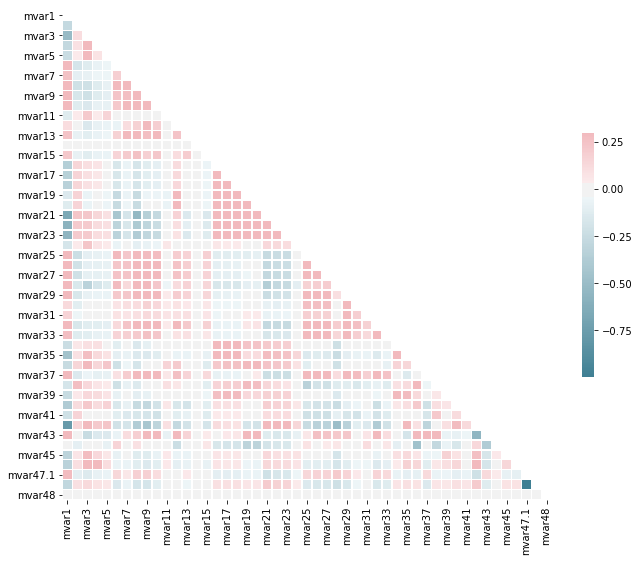

In [5]:
# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
l = dict()

for index, row in corr.iterrows():
    b = 1
    l[index] = []
    for column in row:
        if abs(column) > 0.4:
            l[index].append(b)
        b += 1
        
l

{'mvar1': [1, 3, 6, 8, 9, 10, 21, 22, 23, 26, 27, 28, 32, 35, 42, 43],
 'mvar10': [1, 7, 8, 9, 10, 32],
 'mvar11': [11],
 'mvar12': [12],
 'mvar13': [13],
 'mvar14': [14],
 'mvar15': [15],
 'mvar16': [16, 17, 18, 19, 20, 21],
 'mvar17': [16, 17, 18, 19, 20, 21],
 'mvar18': [16, 17, 18, 19, 20, 21],
 'mvar19': [16, 17, 18, 19, 20, 21, 22, 23],
 'mvar2': [2],
 'mvar20': [16, 17, 18, 19, 20, 21, 22, 23],
 'mvar21': [1, 6, 8, 16, 17, 18, 19, 20, 21, 22, 23],
 'mvar22': [1, 19, 20, 21, 22, 23],
 'mvar23': [1, 19, 20, 21, 22, 23],
 'mvar24': [24],
 'mvar25': [25, 26, 27, 29, 32],
 'mvar26': [1, 9, 25, 26, 27, 29, 32, 37],
 'mvar27': [1, 8, 9, 25, 26, 27, 29, 32, 37],
 'mvar28': [1, 28, 42],
 'mvar29': [9, 25, 26, 27, 29, 31, 32, 33, 37],
 'mvar3': [1, 3, 5, 42],
 'mvar30': [30],
 'mvar31': [29, 31],
 'mvar32': [1, 8, 9, 10, 25, 26, 27, 29, 32, 37, 43],
 'mvar33': [29, 33],
 'mvar34': [34, 35, 39],
 'mvar35': [1, 34, 35],
 'mvar36': [36, 38, 43, 44],
 'mvar37': [9, 26, 27, 29, 32, 37],
 'mvar

In [7]:
df2 = df1.fillna(df1.mean())
df2.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47.1,mvar47.2,mvar48
0,1696.0,1.6541,0.000,0.0,0.0,0.00000,6015.0,322.000000,40369.000000,18414.0,...,73.780000,82.54700,0.08696,10.0,0.63899,0.070523,0.000000,0,1,10
1,1846.0,0.8095,0.000,0.0,0.0,102.00000,7532.0,3171.000000,18234.000000,13664.0,...,99.129000,72.01657,0.00000,13.0,0.63836,0.070523,0.093187,1,0,732
2,1745.0,0.4001,0.000,0.0,0.0,1633.42928,2536.0,6822.332227,34030.596329,2536.0,...,97.851158,29.29000,0.00000,1.0,1.00000,0.070523,0.000000,0,1,89
3,1739.0,0.2193,0.000,0.0,0.0,1982.00000,26440.0,4955.000000,20316.000000,37013.0,...,96.272000,72.01657,0.15385,3.0,0.53241,0.000000,0.000000,1,0,3
4,1787.0,0.0118,0.225,0.0,0.0,5451.00000,5494.0,5494.000000,7987.000000,4696.0,...,115.019000,72.01657,0.00000,1.0,0.92665,0.070523,0.093187,1,0,5


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.4, 
                                                    random_state=1) 
# create logistic regression object 
reg = linear_model.LogisticRegression() 
   
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = reg.predict(X_test) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 72.3975903614


In [28]:
# Perform 6-fold cross validation
scores = cross_val_score(reg, df2, y, cv=10)

In [29]:
scores

array([ 0.72930972,  0.72292495,  0.72653897,  0.73244187,  0.7305144 ,
        0.7322569 ,  0.73032896,  0.74454754,  0.73153392,  0.73044945])

In [27]:
X = np.array(df2)
kf = KFold(n_splits=10)
KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
    y_pred = reg.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred)*100)

TRAIN: [ 8300  8301  8302 ..., 82997 82998 82999] TEST: [   0    1    2 ..., 8297 8298 8299]
73.4578313253
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [ 8300  8301  8302 ..., 16597 16598 16599]
74.5662650602
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [16600 16601 16602 ..., 24897 24898 24899]
72.8313253012
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [24900 24901 24902 ..., 33197 33198 33199]
71.9036144578
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [33200 33201 33202 ..., 41497 41498 41499]
72.4698795181
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [41500 41501 41502 ..., 49797 49798 49799]
72.313253012
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [49800 49801 49802 ..., 58097 58098 58099]
73.6506024096
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [58100 58101 58102 ..., 66397 66398 66399]
71.9156626506
TRAIN: [    0     1     2 ..., 82997 82998 82999] TEST: [66400 66401 66402 ..., 74697 74698 74699]
71.2